# Statistische Messunsicherheit

Statistische, oder zufällige, Einflüsse auf einen Messwert lassen sich leider nicht korrigieren, dennoch können durch wiederholte Messungen der eigentliche Messwert bestimmt werden. Wiederholte Messungen sind auch als Messreihe bekannt. Hierbei wird eine Anzahl von $m$ Messungen für ein und denselben Messwert durchgeführt. Die einzelnen Messwerte $x_j = [x_1, x_2, ... x_m]$ unterscheiden sich, da der *wahre* Wert, $x_w$, immer mit einer zufälligen Abweichung, $A_j$,  versehen wird:

$$x_j = x_w + A_j$$

Bei genügend vielen Wiederholungen der Messung kann in vielen Fällen beobachtet werden, dass sich die Messwerte $x_j$ um einen zentralen Wert, $\overline x$ scharen. Die Häufigkeit, einen Messwert in einem bestimmten Abstand zu diesem zentralen Wert zu finden, $|x_j - \overline x|$, ist umso kleiner, je größer der Abstand ist. Man spricht hierbei von einer Häufigkeitsverteilung der $x_j$. Die grafische Darstellung einer solchen Messreihe erfolgt in einem **Histogramm**. 

## Histogramm 

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Histogramm zeichnen - einfach erklärt (Statistikquelle)

<iframe width="200" height="113" src="https://www.youtube.com/embed/6jto_CLbtYk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Die Histogramm-Darstellung wird insbesondere dann häufig benutzt, wenn Messreihen mit vielen Messwerten vorliegen. An einer solchen Darstellung erkennt man die Art der zugrundeliegenden Verteilung der Messwerte (symmetrisch, schief, ...) und die ungefähre Lage und Streuung. Außerdem können *Ausreißer*, also Messwerte die viel zu weit von den anderen Messwerten entfernt liegen, identifiziert werden. 

In nachfolgendem Code-Block wird für die Messreihe

$$1.41, 1.35, 1.45, 1.43, 1.44, 1.43,
 1.41, 1.32, 1.43, 1.40, 1.49, 1.40,
 1.40, 1.42, 1.40, 1.38, 1.37,  1.36,
 1.37, 1.32, 1.47, 1.40$$

die **absolute Häufigkeit** der einzelnen Werte in einer bestimmten Klasse grafisch dargestellt. Dafür werden sogenannten *Klassen* erstellt, inwelche die einzelnen Messwerte eingruppiert werden. Diese Klassen müssen nicht zwangsläufig die gleiche Breite haben. Bei gleich großen Klassen (gleich breite Balken) kann die absolute Häufigkeit als Höhe angegeben werden, was für die oben gegebene Messreihe im nachfogenden Diagramm gezeigt ist:

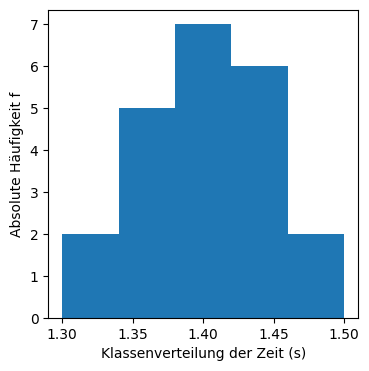

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Matplotlib settings
plt.style.use('default')
plt.rcParams['font.size'] = 10
fig, ax = plt.subplots(figsize=(4, 4))

# Sample data
t_sec = pd.DataFrame([1.41, 1.35, 1.45, 1.43, 1.44, 1.43,
                      1.41, 1.32, 1.43, 1.40, 1.49, 1.40,
                      1.40, 1.42, 1.40, 1.38, 1.37, 1.36,
                      1.37, 1.32, 1.47, 1.40])
klasse = np.linspace(1.3, 1.5, 6)

# Calculate the histogram using np.histogram
hist_values, bin_edges = np.histogram(t_sec, bins=klasse)
ax.hist(t_sec, bins=klasse)
ax.set_ylabel('Absolute Häufigkeit f')
ax.set_xlabel('Klassenverteilung der Zeit (s)')
plt.show()

Im Diagramm ist die absolute Häufigkeit der Zeitmessung dargestellt. Die Klassen sind jeweils gleich groß mit einer Breite von 0,04s. In der ersten befinden sich die Messwerte von 1.3s-1.34s. 

In [2]:
# Print histogram data as a table
from tabulate import tabulate

# Create a DataFrame from the histogram data
hist_df = pd.DataFrame({'Klasse (s)': bin_edges[:-1], 'Häufigkeit f': hist_values})

print(tabulate(hist_df, headers='keys', tablefmt='pretty'))

+---+--------------------+--------------+
|   |     Klasse (s)     | Häufigkeit f |
+---+--------------------+--------------+
| 0 |        1.3         |     2.0      |
| 1 |        1.34        |     5.0      |
| 2 | 1.3800000000000001 |     7.0      |
| 3 |        1.42        |     6.0      |
| 4 |        1.46        |     2.0      |
+---+--------------------+--------------+


Anhand dieser Darstellung kann man schon vermuten, dass der *richtige* Werte unseres Experimentes irgendwo im Bereich zwischen 1,38s - 1,41s liegt, da hier die meisten Messungen auftreten. 

## Häufigkeitsdichte 

Sind die Klassen nicht gleich groß, müssen wir die Dichte der Häufigkeit berechnen.
Die **relative Häufigkeit $h$** berechnet sich aus der absoluten Häufigkeit dividiert durch die Gesamtanzahl der vorgenommenen Messungen, $m$:

$$h_i = \frac{f_i}{m}$$

Aus der Häufigkeit lässt sich dann die sogenannte **Häufigkeitsdichte $d$** berechnen. 
Die Häufigkeitsdichte gibt bei einem Histogramm die Höhe des Rechtecks an (Die Fläche der Balken gibt dann die relative Häufigkeit an). Mit ihr kann man den Vergleich verschiedener Klassen erst vornehmen. Anders ausgedrückt heißt dass, dass die Häufigkeitsdichte einer Klasse das Verhältnis der absoluten oder der relativen Häufigkeit einer Klasse zur entsprechenden Klassenbreite ist. Genauso lässt sich die Häufigkeitsdichte auch berechnen:

$$ d_i = \frac{\textrm{relative Häufigkeit ($h_i$)}}{\textrm{obere Grenze der Klasse i} - \textrm{untere Grenze der Klasse i}} = \frac{h_i}{b_i}$$

$$ D_i = \frac{\textrm{absolute Häufigkeit ($f_i$)}}{\textrm{obere Grenze der Klasse i} - \textrm{untere Grenze der Klasse i}} = \frac{f_i}{b_i}$$

Das Integral über die relative Häufigkeitsdichte ist immer auf 1 normiert, bzw. auf 100% im Falle der absoluten Häufigkeitsdichte.

Im nachstehenden Code-Block wird die relative Häufigkeitsdichte, $d_i$, für die obenstehende Messreihe geplottet und das Integral berechnet. 

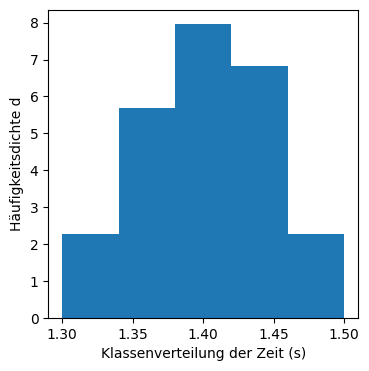

In [3]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(4,4)) # Plot-Größe

bconts, bedges, _p = plt.hist(t_sec, density=True, bins=np.linspace(1.3, 1.5, 6))
plt.ylabel('Häufigkeitsdichte d')
plt.xlabel('Klassenverteilung der Zeit (s)')
plt.show()


Im Diagramm ist die relative Häufigkeitsdichte $d$ der Zeitmessung dargestellt. Die Fläche der Balken gibt die relative Häufigkeit $h$ an. In Summe muss diese 1 betragen (100% im Falle der absoluten Häufigkeitsdichte).


In [4]:
print('Integral über die Häufigkeitsdichte: ',(bconts * np.diff(bedges)).sum())

Integral über die Häufigkeitsdichte:  1.0


Die Wahrscheinlichkeit, einen Messwert innerhalb eines kleinen Intervalls $\Delta x$ um den Wert $\overline x$ zu finden, ist $dP(X) = d(x)\cdot \Delta x$, wobei $d(x) = d_i$.

## Zentraler Grenzwertsatz

Je größer die Stichprobe $m$ (Anzahl der Messungen), desto eher erkennt man die zugrundeliegende Verteilung, der die Messreihe unterliegt. Häufig handelt es sich in der Praxis um eine *Normalverteilung* (oder auch Gaußverteilung genannt):

$$P(x) = \frac{1}{\sigma \sqrt{2\pi}}\int_{x_1}^{x_2} \mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

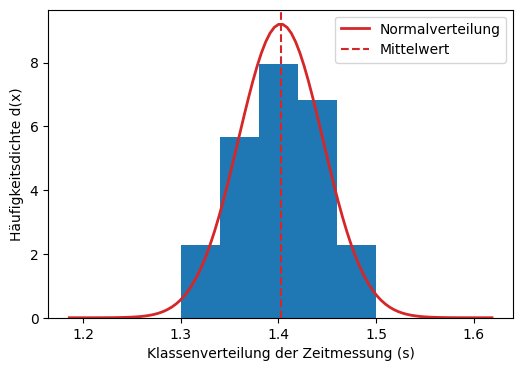

In [5]:
from scipy.stats import norm
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

n = len(t_sec)
data=np.array(t_sec)
mean=data.mean()
std=data.std(ddof=1)

bconts, bedges, _p = plt.hist(t_sec, density=True, bins=np.linspace(1.3, 1.5, 6))
#xmin, xmax = plt.xlim()
xmin = mean-5*std
xmax = mean+5*std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)
plt.plot(x, p, linewidth=2, label = 'Normalverteilung', color = "tab:red")
plt.axvline(x=mean, color="tab:red", ls='--', label='Mittelwert')
plt.ylabel('Häufigkeitsdichte d(x)')
plt.xlabel('Klassenverteilung der Zeitmessung (s)')
plt.legend()
plt.show()

Im Diagramm sind die relative Häufigkeitsdichte $d$ der Zeitmessung und ein Modell der Normalverteilung $P(x)$ dargestellt.


Überraschenderweise ist die Verteilungsfunktion häufig auch dann immer noch normalverteilt, wenn sehr viele externe Störungen (evtl. mit unterschiedlichen Verteilungsfunktionen) zu einer gemeinsamen Störgröße kombiniert werden. Die zusammengefasste Störung ist trotzdem fast immer gaußverteilt, egal wie die Einzelverteilungen aussehen (Poissonverteilung oder anderes). Dies wird auch als der **zentrale Grenzwertsatz der Wahrscheinlichkeitstheorie** bezeichnet.


```{prf:definition} **Zentraler Grenzwertsatz der Wahrscheinlichkeitstheorie**
Der Durchschnitt einer großen Anzahl von Zufallsvariablen aus derselben Verteilung sind annäherend normalverteilt, unabhängig von der Verteilungsfunktion aus der sie herausgenommen wurden. 
```

## Statistische Größen: Normalverteilung

### Arithmetisches Mittel und Varianz (unendliche Stichprobe)

Für normalverteilte Zufalslgrößen (wie in unsere obigen Messreihe) können wir mittels statistischen Methoden Messwerte und Messunsicherheit aus der Stichprobe bestimmen. 

Normalverteilte Zufallsgrößen werden immer von zwei Parametern $\overline x$ und $\sigma$ beschrieben. 
Der **arithmetische Mittelwert $\overline x$**, der das **arithmetische Mittel $\mu$** aus $m$ Beobachtungen ist, oder auch **Erwartungswert $E(x)$** genannt, gilt:

$$\overline x = \frac{1}{m}\sum_{j=1}^m x_j =: E(x) = \left< x \right> = \mu$$

Der *Erwartungswert der quadratischen Abweichung der Einzelmessungen vom Mittelwert*, die **Varianz** $\sigma^2$, ist:

$$\sigma^2  =  \frac{1}{m} \sum_{j=1}^m \left( x_j - \mu \right)^2$$

Der arithmetische Mittelwert zeichnet sich dadurch aus, dass für diesen Wert die Summe der Abweichungsquadrate minimal ist. Die Varianz hängt nicht von der Anzahl der Messungen ab. Die Streuung kann *ausschließlich* durch ein besseres Messverfahren verkleinert werden. Anschaulich ist das direkt nachvollziehbar: Die „Punktwolke“ der Messergebnisse um den Mittelwert schmiegt sich nicht enger an den Mittelwert, nur weil häufiger gemessen wurde. Ein stark streuendes Messverfahren streut durch seine Wiederholung nicht weniger. 

Unabhängig von der zugrundeliegenden Verteilung der Messwerte kann nun ein Maß für die Abweichung definiert werden, welche als **Standardabweichung der Einzelmessungen** bekannt ist und sich aus der Quadratwurzel der Varianz berechnen lässt:

$$\sigma = \sqrt{\frac{1}{m} \sum_{j=1}^m (x_j - \mu)^2}$$

Man nehme beispielhaft die Zeitmessung von oben. Es wurden 15 wiederholte Messungen der Zeit durchgeführt. Mittelwert, Standardabweichung der Einzelmessungen und Unsicherheit des Mittelwertes werden berechnet. 

In [6]:
import math

def arithmetischer_mittelwert(array): 
    n = len(array)
    return sum(array) / n


def arithmetischer_varianz(array): 
    n = len(array)
    mn = sum(array) / n
    var = (1 / (n)) * sum(map(lambda xi: (xi-mn) ** 2 , array)) 
    return var

def arithmetischer_standard_abweichung(array): 
    n = len(array)
    mn = sum(array) / n
    var = (1 / (n)) * sum(map(lambda xi: (xi-mn) ** 2 , array)) 
    std = math.sqrt(var)
    return std

# Berechne arithmetische Statistik
arithm_mittelwert = arithmetischer_mittelwert(t_sec.to_numpy().flatten())
arithm_varianz = arithmetischer_varianz(t_sec.to_numpy().flatten())
arithm_stdabweichung = arithmetischer_standard_abweichung(t_sec.to_numpy().flatten())

# DataFrame für die Zusammenfassungsstatistiken erstellen
zusammenfassung_data = {
    'Statistische Größe': ['Mittelwert (s)', 'Varianz (s^2)', 'Standardabweichung (s)'],
    'Arithmetisch': [arithm_mittelwert, arithm_varianz, arithm_stdabweichung]
}

zusammenfassung_df = pd.DataFrame(zusammenfassung_data)
# Histogramm-Daten als Tabelle ausgeben
print("\nZusammenfassungsstatistiken:")
print(tabulate(zusammenfassung_df, headers='keys', tablefmt='pretty'))


Zusammenfassungsstatistiken:
+---+------------------------+-----------------------+
|   |   Statistische Größe   |     Arithmetisch      |
+---+------------------------+-----------------------+
| 0 |     Mittelwert (s)     |  1.4022727272727271   |
| 1 |     Varianz (s^2)      | 0.0017902892561983434 |
| 2 | Standardabweichung (s) | 0.042311809890364455  |
+---+------------------------+-----------------------+


### Empirisches Mittel und Varianz (endliche Stichprobe)

Du wirst bei deinen Messungen in der Regel weniger an der Streuung um den Mittelwert, sondern mehr an der (geschätzten) Streuung der Messwerte um den (unbekannten) *wahren* Wert interessiert sein. Diese Unsicherheit schätzt man durch die **empirische Varianz $s^2(x)$ der Messwerte der $x_j$** ab. Diese ist etwas größer als die Varianz $\sigma^2$, nämlich um den Faktor $m/(m − 1)$:

$$s^2 = \frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2$$


Die **empirische Standardabweichung $s(x)$ der Messwerte** ist die wieder Wurzel, diesmal aus der empirischen Varianz:

$$s = \sqrt{\frac{1}{m-1} \sum_{j=1}^m (x_j - \overline x)^2}$$

In [7]:
# Mittelwert, Varianz und Standardabweichung berechnen
emp_mittelwert = t_sec.mean().values[0]
emp_varianz = t_sec.var().values[0]
emp_stdabweichung = t_sec.std().values[0]

# DataFrame für die Zusammenfassungsstatistiken erstellen
zusammenfassung_data = {
    'Statistische Größe': ['Mittelwert (s)', 'Varianz (s^2)', 'Standardabweichung (s)'],
    'Arithmetisch': [arithm_mittelwert, arithm_varianz, arithm_stdabweichung],
    'Empirisch': [emp_mittelwert, emp_varianz, emp_stdabweichung]
}

zusammenfassung_df = pd.DataFrame(zusammenfassung_data)
# Histogramm-Daten als Tabelle ausgeben
print("\nZusammenfassungsstatistiken:")
print(tabulate(zusammenfassung_df, headers='keys', tablefmt='pretty'))


Zusammenfassungsstatistiken:
+---+------------------------+-----------------------+-----------------------+
|   |   Statistische Größe   |     Arithmetisch      |       Empirisch       |
+---+------------------------+-----------------------+-----------------------+
| 0 |     Mittelwert (s)     |  1.4022727272727271   |  1.4022727272727271   |
| 1 |     Varianz (s^2)      | 0.0017902892561983434 | 0.0018755411255411217 |
| 2 | Standardabweichung (s) | 0.042311809890364455  | 0.043307518118002576  |
+---+------------------------+-----------------------+-----------------------+


Die Größen $\sigma$ und $s$ unterscheiden sich aufgrund von $m \rightarrow m-1$! Je weniger Messwerte $m$, desto signifikanter ist der Unterschied.
Welche Größe, s oder $\sigma$, als Messunsicherheit für die Einzelmessung $x$ verwendet wird hängt vom Einzelfall ab. Wichtig ist, dass man dazu schreibt, welcher Wert verwendet wurde, damit die Argumentation nochvollzogen werden kann. Generell sollte $s$ insbesondere bei wenigen Messwerten verwendet werden, denn mit $s$ ist auch der etwas seltsame Fall einer Einzelmessung abgedeckt: für m = 1 wäre $\sigma$ = 0, $s$ dagegen nicht definiert. Die zweite Aussage ist, bezogen auf die statistische Interpretation, sicher sinnvoller.

In [8]:
# DataFrame für die Zusammenfassungsstatistiken erstellen
zusammenfassung_data = {
    'Statistische Größe': ['Mittelwert (s)', 'Varianz (s^2)', 'Standardabweichung (s)'],
    'Arithmetisch': [arithm_mittelwert, arithm_varianz, arithm_stdabweichung],
    'Empirisch': [emp_mittelwert, emp_varianz, emp_stdabweichung],
    'Differenz (%)': [(arithm_mittelwert-emp_mittelwert)*100, (arithm_varianz-emp_varianz)*100, (arithm_stdabweichung-emp_stdabweichung)*100]
}

zusammenfassung_df = pd.DataFrame(zusammenfassung_data)
# Histogramm-Daten als Tabelle ausgeben
print("\nZusammenfassungsstatistiken:")
print(tabulate(zusammenfassung_df, headers='keys', tablefmt='pretty'))


Zusammenfassungsstatistiken:
+---+------------------------+-----------------------+-----------------------+-----------------------+
|   |   Statistische Größe   |     Arithmetisch      |       Empirisch       |     Differenz (%)     |
+---+------------------------+-----------------------+-----------------------+-----------------------+
| 0 |     Mittelwert (s)     |  1.4022727272727271   |  1.4022727272727271   |          0.0          |
| 1 |     Varianz (s^2)      | 0.0017902892561983434 | 0.0018755411255411217 | -0.008525186934277826 |
| 2 | Standardabweichung (s) | 0.042311809890364455  | 0.043307518118002576  | -0.09957082276381216  |
+---+------------------------+-----------------------+-----------------------+-----------------------+


### Messunsicherheit des Mittelwertes 

Der Grenzwertsatz sagt aus, wenn man eine ausreichend große Stichprobe aus einer *Grundgesamtheit* nimmt, so wird der **Mittelwert der Stichprobe** näherungsweise dem **Mittelwert der Grundgesamtheit** entsprechen und sich somit dem *wahren* Wert annähern.  
Das heißt, als Messwert von einer Stichprobe geben wir den Mittelwert an. Dieser muss noch mit einer Unsicherheit versehen werden, um das Messergebnis komplett zu machen. Wie wirkt sich die zu erwartende Messunsicherheit der einzelnen Messwerte $s(x)$ auf die Unsicherheit des Mittelwerts $s(\overline x)$ der Messreihe aus?

Angenommen, wir nehmen jetzt viele ($k$) Stichproben auf und berechnen jedes mal den Mittelwert, so sind laut *Grenzwertsatz* die Mittelwerte normalverteilt! 
Das heißt aus den verschiedenen Mittelwerten von $k$ Stichproben könnte theoretisch wieder ein Mitelwert berechnet werden und folglich auch eine **Standardabweichung der Mittelwerte**:

```{prf:definition} **Standardabweichung der Mittelwerte**
$$s(\overline x) = \frac{s}{\sqrt{m}} = \sqrt{\frac{1}{m(m-1)} \sum_{j=1}^m (x_j - \overline x)^2}$$
```

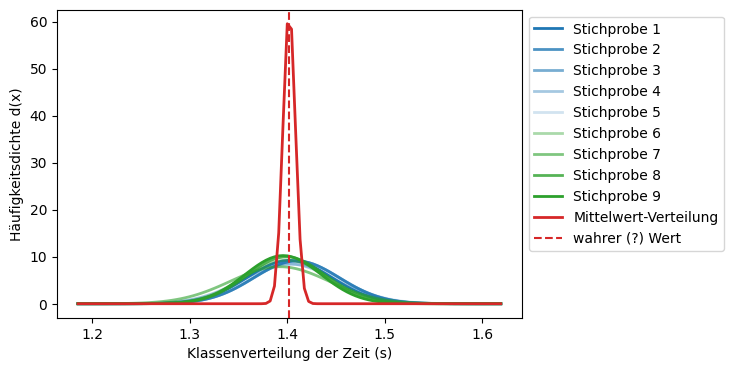

In [9]:
# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.figure(figsize=(6,4)) # Plot-Größe
#plt.xkcd()
plt.rcParams['font.size'] = 10; # Schriftgröße

n = len(t_sec)
data=np.array(t_sec)
mean=data.mean()
std=data.std(ddof=1)

x_volt_2 = np.random.normal(mean, std, n)
x_volt_3 = np.random.normal(mean, std, n)
x_volt_4 = np.random.normal(mean, std, n)
x_volt_5 = np.random.normal(mean, std, n)
x_volt_6 = np.random.normal(mean, std, n)
x_volt_7 = np.random.normal(mean, std, n)
x_volt_8 = np.random.normal(mean, std, n)
x_volt_9 = np.random.normal(mean, std, n)
data_2=np.array(x_volt_2)
data_3=np.array(x_volt_3)
data_4=np.array(x_volt_4)
data_5=np.array(x_volt_5)
data_6=np.array(x_volt_6)
data_7=np.array(x_volt_7)
data_8=np.array(x_volt_8)
data_9=np.array(x_volt_9)

means = [data.mean(), data_2.mean(), data_3.mean(),data_4.mean(),data_5.mean(),data_6.mean(),data_7.mean(),data_8.mean(),data_9.mean(),]
data_means = np.array(means)
#bconts, bedges, _p = plt.hist(x_volt, density=True, bins=np.linspace(0.95, 1.05, 6), label = "Messwerte, Sichprobe 1")
#xmin, xmax = plt.xlim()
xmin = mean-5*std
xmax = mean+5*std
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, data.mean(), data.std(ddof=1))
p_2 = norm.pdf(x, data_2.mean(), data_2.std(ddof=1))
p_3 = norm.pdf(x, data_3.mean(), data_3.std(ddof=1))
p_4 = norm.pdf(x, data_4.mean(), data_4.std(ddof=1))
p_5 = norm.pdf(x, data_5.mean(), data_5.std(ddof=1))
p_6 = norm.pdf(x, data_6.mean(), data_6.std(ddof=1))
p_7 = norm.pdf(x, data_7.mean(), data_7.std(ddof=1))
p_8 = norm.pdf(x, data_8.mean(), data_8.std(ddof=1))
p_9 = norm.pdf(x, data_9.mean(), data_9.std(ddof=1))
p_means = norm.pdf(x, data_means.mean(), data_means.std(ddof=1))
plt.plot(x, p, linewidth=2, label = 'Stichprobe 1', color="tab:blue", alpha = 1.0)
plt.plot(x, p_2, linewidth=2, label = 'Stichprobe 2', color="tab:blue", alpha = 0.8)
plt.plot(x, p_2, linewidth=2, label = 'Stichprobe 3', color="tab:blue", alpha = 0.6)
plt.plot(x, p_3, linewidth=2, label = 'Stichprobe 4', color="tab:blue", alpha = 0.4)
plt.plot(x, p_4, linewidth=2, label = 'Stichprobe 5', color="tab:blue", alpha = 0.2)
plt.plot(x, p_5, linewidth=2, label = 'Stichprobe 6', color="tab:green", alpha = 0.4)
plt.plot(x, p_6, linewidth=2, label = 'Stichprobe 7', color="tab:green", alpha = 0.6)
plt.plot(x, p_7, linewidth=2, label = 'Stichprobe 8', color="tab:green", alpha = 0.8)
plt.plot(x, p_8, linewidth=2, label = 'Stichprobe 9', color="tab:green", alpha = 1.0)
plt.plot(x, p_means, linewidth=2, label = 'Mittelwert-Verteilung', color="tab:red", alpha = 1.0)

plt.axvline(x=data_means.mean(), color="tab:red", ls='--', label='wahrer (?) Wert')
plt.ylabel('Häufigkeitsdichte d(x)')
plt.xlabel('Klassenverteilung der Zeit (s)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

```{warning} 
Die **Standardabweichung des Mittelwertes $s(\overline x)$** einer Messreihe ist gegenüber der Abweichung der Einzelmessungen $s(x)$ um den Faktor $\sqrt{m}$ reduziert. Der Grund dafür ist, dass sich statistisch ermittelte Unsicherheiten teilweise herausmitteln. 
```

Bei einer großen Anzahl Messungen (>30) liegen etwa 68% der **Einzel**-Messungen im Intervall $\pm s(x)$ **um den Mittelwert** der Messreihe herum. Würden man den wahren Wert kennen, könnte man weiter herausfinden, dass etwa 68% der **Mittelwerte** im Intervall $\pm s(\overline x)$ **um den wahren** Wert lägen.

```{admonition} Standardabweichung des Mittelwertes
:class: tip
Für die Standardabweichung des Mittelwertes des obigen Zeitmessreihe erhalten wir dadurch

$$u_{\overline x} = \frac{s}{\sqrt{m}} = \frac{0,0433\,\mathrm s}{\sqrt{22}} = 0,009\,\mathrm s$$

```

### Normierte Normalverteilung

Laut dem zentralen Grenzwertsatz folgen also viele Messungen einer Normalverteilung. Um verschiedene Messungen miteinander zu vergleichen, benutzt man häufig die normierte Normalverteilung. Dadurch können die Verteilungen verschiedener Messwerte miteinander verglichen werden, unabhängig von deren physikalischen Einheit. 

Jede Normalverteilung kann in eine normierte Gaußverteilung transformiert werden. Der Übergang erfolgt mit einer Transformation, die die Messwerte normiert. Die Differenz aus Messwert und Mittelwert, $x-\mu$, wird auf die Standardabweichung $\sigma$ bzw. $s$ normiert:

$$z = \frac{x-\mu}{\sigma}$$

Dadurch erhält man folgende Funktion für $\mu = 0$ und $\sigma = 1$ und $-1$:

$$p(z) = \frac{1}{\sqrt{2\pi}}\mathrm e^{-\frac{z^2}{2 ^2}} $$

:::{figure-md} normal_normiert_trafo
<img src="draw/normal_normiert_trafo.jpg" alt="normal_normiert_trafo" width="600px" label = normal_normiert_trafo>

Transformation der Normalverteilung in eine normierte Normalverteilung.
:::


Der Flächeninhalt unterhalb dieser Verteilungsfunktion ist wieder auf 100% normiert, wenn von $\pm \infty$ integriert wird. Die maximale Amplitude ist jetzt $1/\sqrt{2 \pi}$. Die $z$-Achse (vorher Messwerte $x$) ist jetzt dimensionslos (einheitenlos). Somit können mit normierten Gaußverteilungen verschiedene physikalische Größen auch von verschiedenen Messgeräten bezüglich ihrer Streuung verglichen werden. 


## Vertrauensintervalle

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Vertrauensintervall für Erwartungswert berechnen - Beispiel einfach erklärt (Mathe - simpleclub)

<iframe width="200" height="113" src="https://www.youtube.com/embed/3-j37bBJlMU" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

::::::{margin}
:::::{grid}
::::{grid-item-card}
:class-header: bg-light
Sigmaregeln - Wahrscheinlichkeiten in der Normalverteilung (Mathe - simpleclub)

<iframe width="200" height="113" src="https://www.youtube.com/embed/OmmODKdYLSI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>
::::
:::::
::::::

Wir haben eben bereits erwähnt, dass 68% der Messwerte innerhalb des Intervalls $\pm \sigma(x)$ liegen. 

```{admonition} Weitere Sigma-Umbegbungen, die man kennen sollte:
:class:
Bei einer echten Normalverteilung gilt folgendes:
* 68,3% aller Messwerte liegen im Bereich $\pm \sigma$
* 95,5% aller Messwerte liegen im Bereich $\pm 2\sigma$
* 99,7% aller Messwerte liegen im Bereich $\pm 3\sigma$
* Im Abstand $\pm \sigma$ sind die Wendestellen
* Die Normalverteilung reicht von $-\infty$ bis $+\infty$ 
```

Bei bekannter  Wahrscheinlichkeitsverteilung $p(x)$ der Messwerte $x$ um den Mittelwert $\overline x$, lässt sich die Wahrscheinlichkeit dafür berechnen, einen Messwert im Intervall $[x_1, x_2]$ um den Mittelwert zu finden. Wir nehmen im Folgenden eine Normalverteilung, mit Standardabweichung $\sigma$, der Messwerte an, dann ist die Wahrscheinlichkeit für
- einen Messwert innerhalb $x\pm dx$: 

$$p(x)dx = \frac{1}{\sigma \sqrt{2\pi}}\mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

- irgendeinen Messwerte zwischen $\pm \infty:$ 

$$P(-\infty < x < \infty) = \int_{-\infty}^\infty p(x)dx = 1$$

- einen Messwert im Intervall $[x_1, x_2]$: 

$$P(x_1 < x < x_2) = \int_{x_1}^{x_2} p(x)dx =  \frac{1}{\sigma \sqrt{2\pi}}\int_{x_1}^{x_2} \mathrm{exp}\left(-\frac{(x-\overline x)^2}{2\sigma^2}\right) dx$$

Das hier auftretende Integral ist nicht elementar berechenbar und man findet stattdessen Tabellen, aus denen man die zugehörigen Wahrscheinlichkeitswerte ablesen kann:

:::{admonition} Tabelle der normierten Wahrscheinlichkeiten in Abhängigkeit von $z$
:class: dropdown
Die Spalten geben die erste Nachkommastelle von $z$ an, die Zeilen die zweite.
![Bild](pictures/normalverteilung_tabelle.png)
:::

Mit $x_1 = \mu - t\cdot \sigma$ und $x_2 = \mu + t\cdot \sigma$ findet man die Wahrscheinlichkeit $P(\mu-t\cdot\sigma \leq x \leq \mu+t\cdot\sigma)$ dafür, dass der Messwert innerhalb einer $t\cdot\sigma$-Umgebung um den Mittelwert liegt. 

:::{admonition} Aufgabe: Wahrscheinlichkeit im Intervall $P(x_1 < x < x_2)$ berechnen
:class: tip
Es soll im Folgenden ein Messsystem einer Abfüllanlage überprüft werden, die Flaschen sind jeweils mit 0,7 l Saftgetränk befüllt.
Aus Kalibrierungen ist bekannt, dass die Messwerte des Messsystems der Abfüllanlage normalverteilt mit einem Erwartungswert $\mu$ = 0,7 l und Standardabweichung $\sigma$ = 5 ml sind. 
Wie groß ist die Wahrscheinlichkeit, dass die Saftflaschen mit einen Inhalt zwischen 0,69 l und 0,71 l befüllt werden?
:::

:::{admonition} Lösung: Wahrscheinlichkeit im Intervall $P(x_1 < x < x_2)$ berechnen
:class: tip, dropdown
* Obere und untere Grenze werden in den $z$-Wert umgerechnet:

 $z_o = \frac{x-\mu}{\sigma} = \frac{(0,69-0,7)\,\mathrm l}{0,005\,\mathrm l} = -2$

 $z_u = \frac{x-\mu}{\sigma} = \frac{(0,71-0,7)\,\mathrm l}{0,005\,\mathrm l} = 2$

* Aus der Tabelle werden die Werte für $z = 2,00$ abgelesen:

 $\phi(2) = 0.97725$ (Wahrscheinlichkeit dafür, dass der Messwert zwischen 0 l und 0,71 l liegt)

 $\phi(-2) = 1 - \phi(2) =  1-0,97725 = 0,02275$ (Wahrscheinlichkeit dafür, dass der Messwert NICHT zwischen 0 l und 0,69 l liegt)

* Berechnung der Wahrscheinlichkeit, dass die Saftflaschen mit einem Inhalt zwischen 0,69 l und 0,71 l befüllt werden:

 $\phi(2) - \phi(-2) = 0,97725-0,02275 = 0,9545$

Mit einer Wahrscheinlichkeit von 95,45 % werden die Flaschen in der Abfüllanlage mit einem Inhalt von 0,69 l – 0,71 l befüllt. Dies entspricht auch genau der Wahrscheinlichkeit der $2\sigma$-Umgebung (siehe vorheriges Kapitel), was für $z = \pm 2$ natürlich auch so sein sollte. 
:::


### Güteklassen von Messgeräten 

Durch diese Intervallgrenzen werden Güteklassen von Messeinrichtungen definiert. Andersherum können auch Anforderungen an Messgeräte gestellt werden: Die Anforderungen werden umso höher, je höher die Wahrscheinlichkeit sein soll, dass sich die Messwerte dem *richtigen* Wert annähern. 
Der Messtechniker kann somit mit der gegebenen Wahrscheinlichkeit abschätzen, ob ermittelte Messwerte innerhalb einer durch Fertigungsunterlagen zugelassenen Toleranz für die Maße eines Werkstücks liegen. Übliche Werte für Invervallgrenzen (meist symmetrisch, also Abweichungen sowohl nach unten als auch nach oben im gleichen Maße).

| Intervallgrenzen | Transformation | $P(x) = \Phi(z)$ | Bezeichnung | Wahrscheinlichkeit
|:-------|:-------|:-------|:-------|:-------|
| $\mu \pm 1 \cdot \sigma$ | 1 | 0,6827| Orientierende Messung | 68,27% |
| $\mu \pm 1{,}96 \cdot \sigma$ | 1,96 | 0,95| Betriebsmessung | 95% |
| $\mu \pm 2 \cdot \sigma$ | 2 | 0,9545| Betriebsmessung | 95,45% |
| $\mu \pm 2{,}58 \cdot \sigma$ | 2,58 | 0,99| Präzisionsmessung | 99% |
| $\mu \pm 3 \cdot \sigma$ | 3 | 0,9973| Präzisionsmessung | 99,73% |
| $\mu \pm 4 \cdot \sigma$ | 4 | 0,9999| Präzisionsmessung | 99,99% |


## Angabe des Messergebnisses mit Unsicherheit
Als Messtechniker gehen wir immer daher davon aus, dass innerhalb $\pm 3s$ alle Messwerte liegen. Auf dieser Basis wird entsprechend auch die Messabweichung berechnet, also A = $\pm 3s$.

Das **Endergebnis** der oben dargestellten Messreihe von $m$ Messwerten wird in der Regel wiefolgt angegeben. Als Messwert wird nicht das Ergebnis einer Einzelmessung angegeben, sondern stets der Mittelwert der Messreihe inkl. seiner Unsicherheit:

$$ s(\overline x) = \frac{s}{\sqrt{m}} = u_{\overline x} $$

Der Mittelwert ist der beste Schätzwert, den wir für den *wahren* Wert ermitteln können. Die Angabe des Messergebnisses erfolgt also wiefolgt:

$$x = \overline x \pm t \cdot u_{\overline x}$$

wobei $t$ ein Maß für den **Vertrauensbereich $v$** ist:

$$v = \pm \frac{t}{\sqrt{m}}\cdot s = u_v$$

Der Vertrauensbereich beschreibt die Aufspreizung des Mittelwertes einer Messreihe zu einem Vertrauensband, das umso breiter ist, je weniger Messwerte zur Auswertung zur Verfügung stehen und je größer das geforderte Vertrauensniveau ist. 
Der Vertrauensbereich gilt als Qualitätsmaß für die Genauigkeit einer durchgeführten Messung. 
Für $t=1$ wählen wir also die $\pm 1s$-Umgebung, in der 68% der Messwerte liegen. Für $t = 2$, also die $\pm 2s$-Umgebung, werden schon 95% aller Messwerte in diesem Bereich erwartet. Die Messabweichung ist dadurch erhöht, das Vertrauen allerdings auch.


:::{admonition} Aufgabe: Gib das Messergebnis für obige Zeitmessreihe an!
:class: tip
Gib das Messergebnis für die obige Zeitmessung für die 68,27%, 95,45% und 99,73% Vertrauensintervalle an (1-, 2- und 3-sigma).
:::

:::{admonition} Lösung: Gib das Messergebnis für obige Zeitmessreihe an!
:class: tip, dropdown
Für die Zeitmessreihe aus dem oben aufgeführten Beispiel waren folgende Parameter gegeben:
* Anzahl der Messwerte $m=22$
* Mittelwert: $\overline x = 1{,}40227\,\mathrm{s}$
* Standardabweichung der Einzelmessung: $s = 0{,}0433\,\mathrm{s}$

Für die Standardabweichung des Mittelwertes erhalten wir dadurch: 

$$u_{\overline x} = \frac{s}{\sqrt{m}} = \frac{0{,}0433\,\mathrm s}{\sqrt{22}} = 0{,}009\,\mathrm s$$

Mit einer Sicherheit von über 68% sind die Messwerte im folgenden Intervall zu erwarten:

$$x = (1{,}402 \pm 2\cdot 0{,}009)\,\mathrm s = (1{,}402 \pm 0{,}009)\,\mathrm s \quad (68{,}27\%)$$

Mit einer Sicherheit von über 95% sind die Messwerte im folgenden Intervall zu erwarten:

$$x = (1{,}402 \pm 2\cdot 0{,}009)\,\mathrm s = (1{,}402 \pm 0{,}018)\,\mathrm s \quad (95\%)$$

Mit einer Sicherheit von über 99% sind die Messwerte im folgenden Intervall zu erwarten:

$$x = (1{,}402 \pm 3\cdot 0{,}009)\,\mathrm s = (1{,}402 \pm 0{,}027)\,\mathrm s \quad (99{,}73\%)$$
:::

In [10]:
# DataFrame für die Zusammenfassungsstatistiken erstellen
zusammenfassung_data = {
    'Statistische Größe': ['Mittelwert (s)', 'Varianz (s^2)', 'Standardabweichung (s)'],
    'Empirisch': [emp_mittelwert, emp_varianz, emp_stdabweichung]
}

zusammenfassung_df = pd.DataFrame(zusammenfassung_data)
# Histogramm-Daten als Tabelle ausgeben
print("\nZusammenfassungsstatistiken:")
print(tabulate(zusammenfassung_df, headers='keys', tablefmt='pretty'))

print('Das Messergebnis für ein Vertrauensintervall von 68,27% (1-sigma-Umgebung) ist: ', round(emp_mittelwert,5), 's +- ', 1*round(emp_stdabweichung/np.sqrt(len(t_sec)),5), 's')
print('Das Messergebnis für ein Vertrauensintervall von 95,45% (2-sigma Umgebung) ist: ', round(emp_mittelwert,5), 's +- ', 2*round(emp_stdabweichung/np.sqrt(len(t_sec)),5), 's')
print('Das Messergebnis für ein Vertrauensintervall von 99,73% (3-sigma Umgebung) ist: ', round(emp_mittelwert,5), 's +- ', 3*round(emp_stdabweichung/np.sqrt(len(t_sec)),5), 's')


Zusammenfassungsstatistiken:
+---+------------------------+-----------------------+
|   |   Statistische Größe   |       Empirisch       |
+---+------------------------+-----------------------+
| 0 |     Mittelwert (s)     |  1.4022727272727271   |
| 1 |     Varianz (s^2)      | 0.0018755411255411217 |
| 2 | Standardabweichung (s) | 0.043307518118002576  |
+---+------------------------+-----------------------+
Das Messergebnis für ein Vertrauensintervall von 68,27% (1-sigma-Umgebung) ist:  1.40227 s +-  0.00923 s
Das Messergebnis für ein Vertrauensintervall von 95,45% (2-sigma Umgebung) ist:  1.40227 s +-  0.01846 s
Das Messergebnis für ein Vertrauensintervall von 99,73% (3-sigma Umgebung) ist:  1.40227 s +-  0.02769 s


## Student-t (kleine Stichproben)

Ist die Zahl der Messwerte nur klein ($m \leq 25$) werden die aus der Normalverteilung berechneten Parameter ziemlich unsicher. Anfang des 20. Jh. veröffentlichte WILLIAM SEALY GOSSET unter dem Pseudonym „Student“ eine Verteilungsfunktion, die eine zuverlässigere Parameterschätzung auch für kleine Stichprobengrößen erlaubt. Für die Messwertanalyse ist folgender Teilaspekt von Bedeutung: Aus der Zahl $m$ der Messwerte und einem vorgegebenen Vertrauensbereich berechnen Sie einen Faktor $t(s=m-1, p=1-\alpha/2)$, der die Unsicherheitsintervalle aus der Normalverteilung korrigiert. 
Die unten stehende Quantil-Tabelle zeigt die zugehörigen Werte von $t$ in Abhängigkeit von der Messwertanzahl, und dem gewählten Vertrauensniveau, dass die geforderte statistische Sicherheit beschreibt:

:::{admonition} Tabelle der $s-p$-Quantile
:class: dropdown
![Bild](pictures/student-t.png)
:::

Die Interpretation der Quantil-Tabelle der Student-t Verteilung kann verwirrend sein. Statt der Anzahl der Messwerte $m$ wird die Anzahl der Freiheitsgrade $s = m-1$ angegeben. Und statt des zweiseitigen Vertrauensbereich $P = 1-\alpha$ wird der halbseitige Vertrauensbereich $p = 1-\alpha/2$ gewählt. Beide *Quantile* können aber über die eben angegebenen Formel einfach bestimmt werden.

Aus der empirischen Standardabweichung des Mittelwertes $s(\overline x)$ berechnet man beispielsweise:

$$u(\overline x) = t(s,p) \cdot s(\overline x) = t(s,p) \cdot \frac{s(x)}{\sqrt{m}}$$


:::{admonition} Beispiel zur Berechnung der Messabweichung einer Messreihe mittels Student-t Verteilung
:class: tip, dropdown

Für die Zeitmessreihe aus dem oben aufgeführten Beispiel waren folgende Parameter gegeben:
* Anzahl der Messwerte $m=22$
* Mittelwert: $\overline x = 1{,}40227\,\mathrm{s}$
* Standardabweichung der Einzelmessung: $s = 0{,}0433\,\mathrm{s}$
* Standardabweichung des Mittelwertes: $u_{\overline x} = \frac{s}{\sqrt{m}} = \frac{0{,}0433\,\mathrm s}{\sqrt{22}} = 0{,}009\,\mathrm s$

Oben hatten wir das Ergebnis, in dem 95% der Messwerte zu finden sind, wiefolgt angegeben ($2\sigma$-Vertrauensbereich benutzen):

$$x = (1{,}402 \pm 2\cdot 0{,}009)\,\mathrm s = (1{,}402 \pm 0{,}018)\,\mathrm s \quad (95\%)$$

In Anbetracht der sehr kleinen Stichprobe von lediglich $m=22$ Messwerten sollte jedoch die Student-t Verteilung hinzugezogen werden und der Vertrauensbereich für 95% korrigiert werden. Es gilt also:

> $P = 1-\alpha = 0{,}95$. Daraus folgt:

> $\Rightarrow \alpha = 1-P = 1-0{,}95 = 0{,}05$

> $\Rightarrow \alpha/2 = 0{,}025$

> $\Rightarrow p = 1-\alpha/2 = 1-0{,}025 = 0{,}975$

Für die Berechnung des s-Quantils gilt:

> $s = m-1 = 22-1 = 21$

Der $t$-Wert des korrigierten Vertrauensbereichs wird aus der Tabelle abgelesen:

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{21; 0{,}975} = 2{,}080$$

$$x = (1{,}402 \pm 2{,}080\cdot 0{,}009)\,\mathrm s = (1{,}402 \pm 0{,}0187)\,\mathrm s \quad (95\% \textrm{ t-Verteilung})$$

Der Unterschied zum Vertrauensbereich, der aus der Normalverteilung hervorgeht, ist ein über 4% höherer Fehler.

:::

## Umrechnung von Vertrauensintervallen

Desweiteren können Vertrauensbereiche unterschiedlicher Wahrscheinlichkeiten ineinander umgerechnet werden:

```{prf:definition} **Umrechnung von Vertrauensbereichen**
$$\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$$
```

Hierbei ist $\alpha$ das Signifikanzniveau, also die Irrtumswahrscheinlichkeit $\alpha = 1-P$, wobei $P$ die Wahrscheinlichkeit bzw. die geforderte statistische Sicherheit ist.


:::{admonition} Beispiel zur Umrechnung von Vertrauensbereichen
:class: tip, dropdown

Die Umrechnung des Vertrauensbereich 95% aus dem letzten Beispiel sollen in einen Vertrauensbereich mit einem anderen Vertrauensniveau, von 99% erfolgen. Die Ergebnisse für 95% sind bekannt. Nun muss das Quantil für 99% (also $\alpha = $1%) bestimmt werden. Analog werden die $s = m-1 = 21$ und $p = 1-\alpha/2 = 1-0{,}005 = 0{,}995$ Quantile bestimmt und der $t$-Wert aus der Tabelle abgelesen: 

$$t_{s;p} = t_{m-1; 1-\alpha/2} = t_{21; 0,995} = 2{,}831$$

Hieraus kann nun nach obiger Gleichung der Vertrauensbereich für 99% berechnet werden:

$$\frac{u_{\alpha 1}}{t_{m-1; 1-\frac{\alpha_1}{2}}} =  \frac{u_{\alpha 2}}{t_{m-1; 1-\frac{\alpha_2}{2}}}$$

$$\Rightarrow u_{\alpha 2} = u_{\alpha 1} \cdot \frac{t_{m-1; 1-\frac{\alpha_2}{2}}}{t_{m-1; 1-\frac{\alpha_1}{2}}} = 0{,}0187\,\mathrm s \cdot 2{,}831 / 2{,}080 = 0{,}025\,\mathrm s$$

Die Angabe des Messergebnisses lautet somit:

$$x = (1{,}402 \pm 0{,}025)\,\mathrm s \quad (99\%)$$
:::

## Zusammenfassung

![Bild](pictures/zusammenfassung_zufaellig.png)